Исходные данные

* Исправлена прбблема с потерей данных от PID https://github.com/makarov-na/alpha-bot2/commit/d41e5fb19a988c2132c4afda1fdc7963c420dea7
* Уровень черного понижен до 300 на обоих датчиках
* Скорость 20

С уровнем черного на 300 заметно ниже стабильность. Даже на скорости 12 идет раскачка и срыв. Надо смотреть на PID

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 

In [2]:
data = load_data('./data/breakdown_on_fixed_fantom.log')
sensor0=data['sensor0']
sensor1=data['sensor1']
sensor2=data['sensor2']
sensor3=data['sensor3']
sensor4=data['sensor4']
left_pid_out = data['left_pid_out']
right_pid_out = data['right_pid_out']
actual_right_pid_out = []

In [3]:
for i in range(0, len(left_pid_out),1):
    if left_pid_out[i] > 0 and right_pid_out[i]>0:
        if left_pid_out[i] > right_pid_out[i]:
            right_pid_out[i] = 0
        elif right_pid_out[i] > left_pid_out[i]:
            left_pid_out[i] = 0

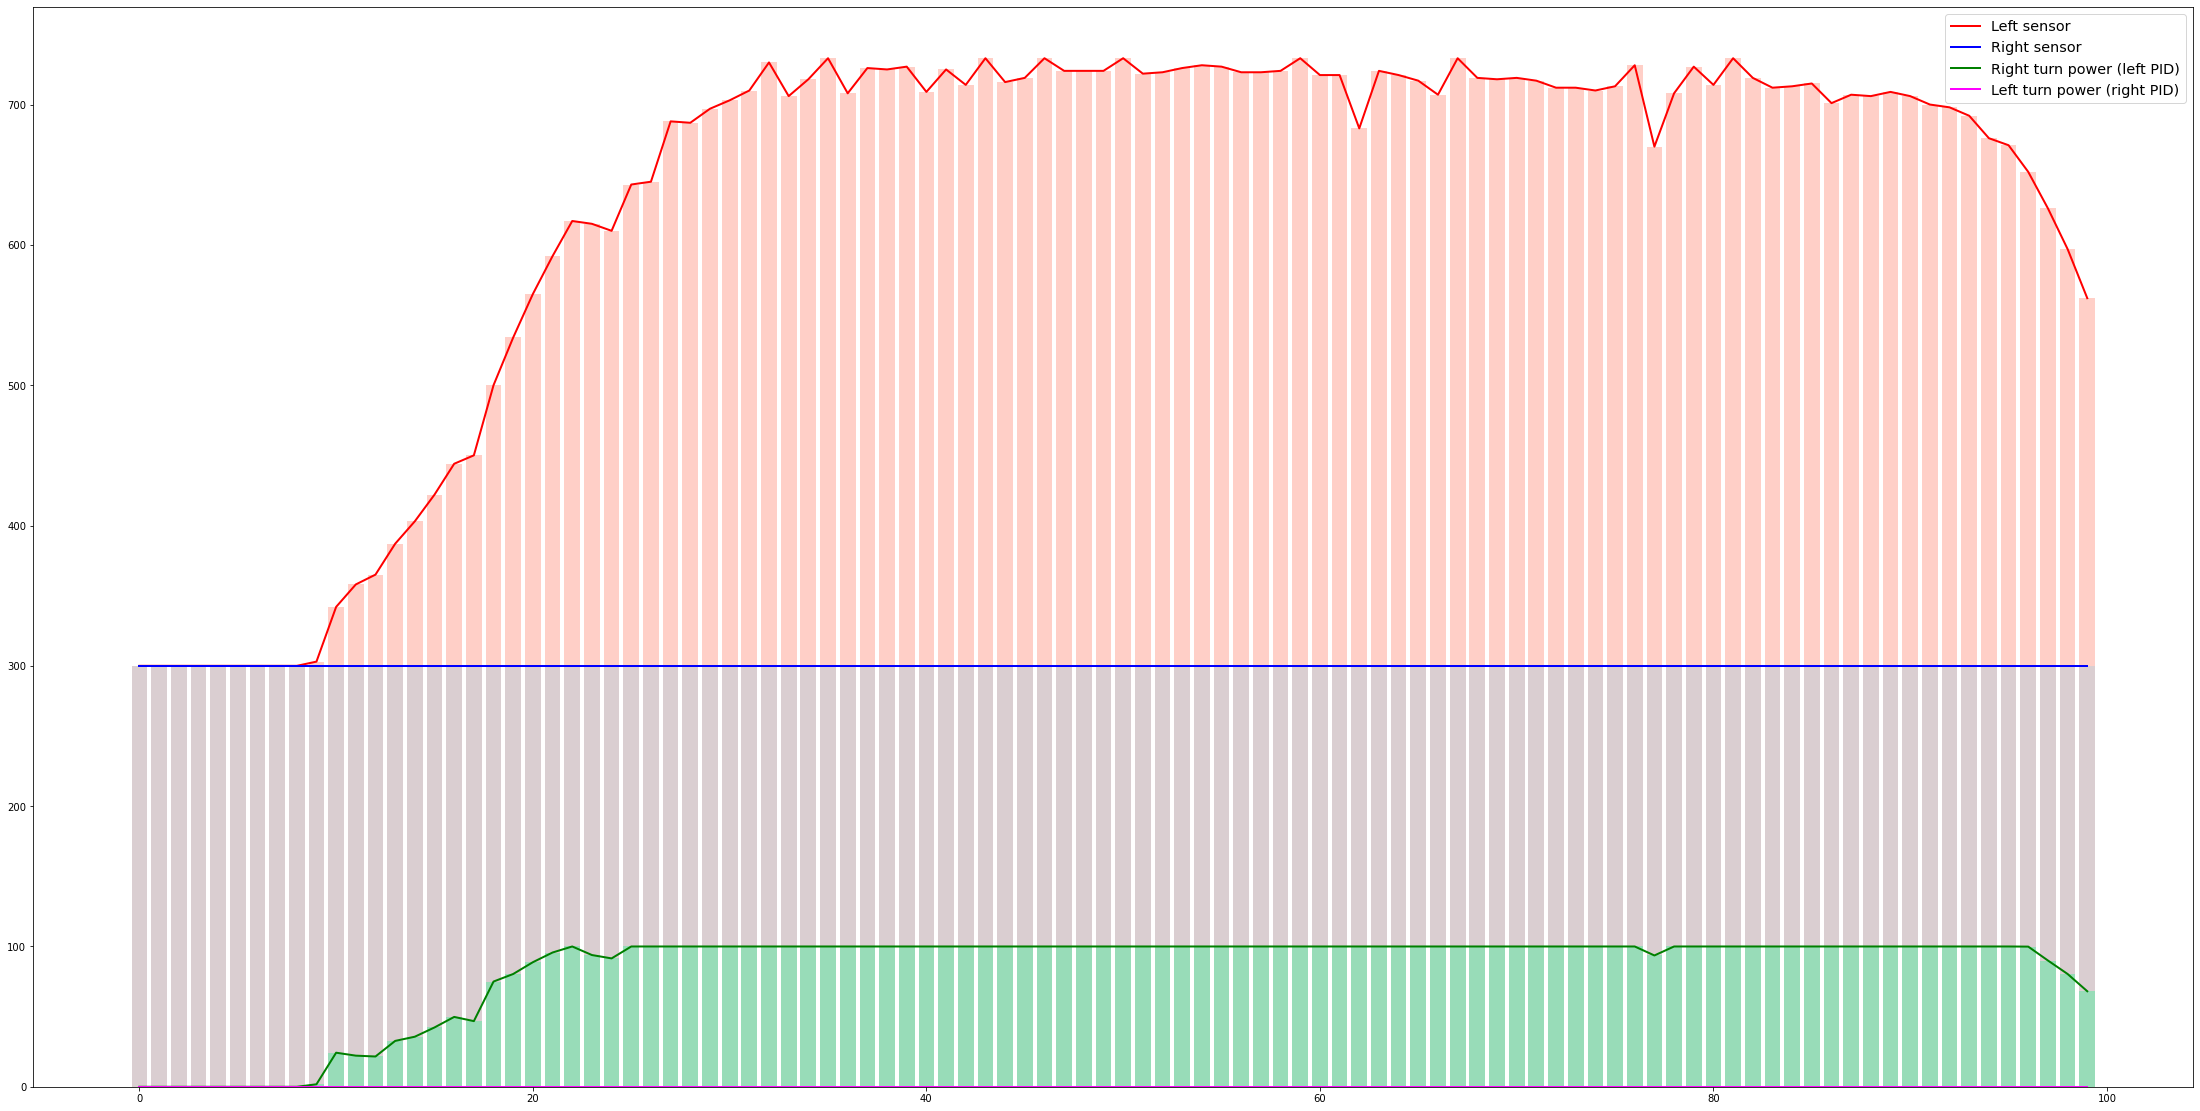

In [4]:
range = 100
start = 3050
end = start + range
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])

ax.plot(sensor1[start:end], linewidth=2.0, color = 'red', label='Left sensor')
ax.bar(np.arange(0,range,1), sensor1[start:end], color = 'tomato', alpha = 0.3)
ax.plot(sensor3[start:end], linewidth=2.0, color = 'blue', label = 'Right sensor')
ax.bar(np.arange(0,range,1), sensor3[start:end], color = 'skyblue', alpha = 0.3)

ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
ax.bar(np.arange(0,range,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
ax.plot(right_pid_out[start:end], linewidth=2.0, color = 'magenta', label = 'Left turn power (right PID)')
ax.bar(np.arange(0,range,1), right_pid_out[start:end], alpha = 0.3, color = 'magenta')
ax.legend(fontsize = 'x-large')


После устранения зануления правого PID значения ситуация изменилась и бот стабильно проходит линию на 12 скорости. При увеличении скорости происходит срыв. Возможно нужно полностю утранить дребезг на черном